In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly 
import plotly.graph_objs as go
import plotly.express as px
import pycountry 
import chart_studio.plotly as py
import cufflinks as cf
from lifelines import KaplanMeierFitter
cf.go_offline()

In [2]:
#https://ourworldindata.org/cancer#cancer-survival-rates-by-income

In [3]:
df_continents = pd.read_csv('../data/continents_countries.csv')

In [4]:
df_continents.rename(columns={'Three_Letter_Country_Code': 'Code'}, inplace=True)

In [5]:
df_continents.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df_continents.columns

Index(['Continent_Name', 'Code'], dtype='object')

# Share of cancer deaths related to tobacco

In [7]:
df_taba = pd.read_csv('../data/share-of-cancer-deaths-attributed-to-tobacco.csv')

In [8]:
df_taba.head()

,Entity,Code,Year,Age-standardized share of cancer deaths attributed to tobacco (%)
0,Afghanistan,AFG,1990,19.3
1,Afghanistan,AFG,1995,19.1
2,Afghanistan,AFG,2000,18.6
3,Afghanistan,AFG,2005,18.9
4,Afghanistan,AFG,2006,19.0


In [9]:
df_taba.describe()

,Year,Age-standardized share of cancer deaths attributed to tobacco (%)
count,1526.000000,1526.000000
mean,2003.142857,19.023722
std,8.221637,11.196638
min,1990.000000,1.500000
25%,1995.000000,8.800000
50%,2005.000000,19.000000
75%,2010.000000,27.700000
max,2016.000000,57.700000


In [10]:
df_taba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526 entries, 0 to 1525
Data columns (total 4 columns):
Entity                                                               1526 non-null object
Code                                                                 1344 non-null object
Year                                                                 1526 non-null int64
Age-standardized share of cancer deaths attributed to tobacco (%)    1526 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ KB


In [11]:
df_taba.dropna(inplace=True)

In [12]:
df_taba.shape

(1344, 4)

In [13]:
df_taba.head()

,Entity,Code,Year,Age-standardized share of cancer deaths attributed to tobacco (%)
0,Afghanistan,AFG,1990,19.3
1,Afghanistan,AFG,1995,19.1
2,Afghanistan,AFG,2000,18.6
3,Afghanistan,AFG,2005,18.9
4,Afghanistan,AFG,2006,19.0


In [14]:
df1_taba = df_taba.rename(columns={"Entity": "Country","Age-standardized share of cancer deaths attributed to tobacco (%)":"Cancer deaths attributed to tobacco (%)"})

In [15]:
df1_taba.head()# renamed DataFrame

,Country,Code,Year,Cancer deaths attributed to tobacco (%)
0,Afghanistan,AFG,1990,19.3
1,Afghanistan,AFG,1995,19.1
2,Afghanistan,AFG,2000,18.6
3,Afghanistan,AFG,2005,18.9
4,Afghanistan,AFG,2006,19.0


In [16]:
df1_taba = df1_taba.merge(df_continents, on='Code')# merging datasets and use Code for ploting in Plotly

In [17]:
df1_taba.head()

,Country,Code,Year,Cancer deaths attributed to tobacco (%),Continent_Name
0,Afghanistan,AFG,1990,19.3,Asia
1,Afghanistan,AFG,1995,19.1,Asia
2,Afghanistan,AFG,2000,18.6,Asia
3,Afghanistan,AFG,2005,18.9,Asia
4,Afghanistan,AFG,2006,19.0,Asia


# Looking at different graphs from original data = df1_taba

In [18]:
df2_taba = df1_taba.groupby('Year').mean()

In [19]:
df2_taba

,Cancer deaths attributed to tobacco (%)
Year,
1990,19.297980
1995,19.312121
2000,18.798990
2005,18.735859
2006,18.718182
2010,18.594444
2016,18.143434


In [20]:
df3_taba = df2_taba.reset_index()

In [21]:
df3_taba

,Year,Cancer deaths attributed to tobacco (%)
0,1990,19.297980
1,1995,19.312121
2,2000,18.798990
3,2005,18.735859
4,2006,18.718182
5,2010,18.594444
6,2016,18.143434


In [22]:
df3_taba.describe()

,Year,Cancer deaths attributed to tobacco (%)
count,7.000000,7.000000
mean,2003.142857,18.800144
std,8.877473,0.407102
min,1990.000000,18.143434
25%,1997.500000,18.656313
50%,2005.000000,18.735859
75%,2008.000000,19.048485
max,2016.000000,19.312121


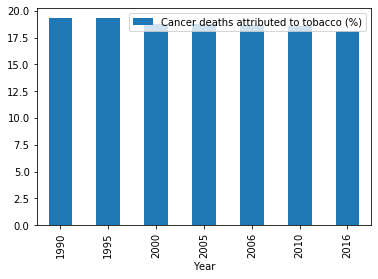

In [23]:
df3_taba.plot(x='Year', y=['Cancer deaths attributed to tobacco (%)'], kind="bar")

In [24]:
fig = px.bar(df3_taba, x="Year", y="Cancer deaths attributed to tobacco (%)",barmode="group",title="Evolution of the proportion (%) of Lung Cancer")
fig.show()

In [25]:
fig = px.line(df3_taba, x="Year", y="Cancer deaths attributed to tobacco (%)",title ="Trend of the proportion")
fig.show()

In [26]:
df4_taba = df1_taba.groupby('Continent_Name').mean()# unsing continent to have a clearer view 

In [27]:
df4_taba

,Year,Cancer deaths attributed to tobacco (%)
Continent_Name,,
Africa,2003.142857,9.545238
Asia,2003.142857,20.681548
Europe,2003.142857,29.336957
North America,2003.142857,15.613143
Oceania,2003.142857,23.024176
South America,2003.142857,14.594048


In [28]:
df4_taba = df4_taba.drop(['Year'],axis=1).reset_index()

In [29]:
df4_taba

,Continent_Name,Cancer deaths attributed to tobacco (%)
0,Africa,9.545238
1,Asia,20.681548
2,Europe,29.336957
3,North America,15.613143
4,Oceania,23.024176
5,South America,14.594048


In [30]:
def create_generator(continent_list):
    for continent in continent_list:
        yield continent
        
continents = create_generator(df4_taba.Continent_Name.tolist())

In [31]:
fig = px.bar(df4_taba, x="Continent_Name", y="Cancer deaths attributed to tobacco (%)", color="Continent_Name",barmode="group",title="Average Cancer deaths caused by tobacco")

fig.update_xaxes(title='Continents')
fig.update_yaxes(title='Cancer deaths attributed to tobacco (%)')


fig.for_each_trace(
    lambda trace: trace.update(name=next(continents)),
)

fig.show()

In [32]:
fig = px.choropleth(df1_taba, locations="Code",
                    color="Cancer deaths attributed to tobacco (%)", 
                    hover_name="Country", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Heat Map of the World")
fig.show()

# Does wealth has an impact on recovery?

In [33]:
df_gdp = pd.read_csv('../data/lung-cancer-survival-rate-vs-gdp.csv')

In [34]:
df_gdp.head()

,Entity,Code,Year,Five-year lung cancer survival rate (%),"GDP per capita, PPP (constant 2011 international $) (constant 2011 international $)",Total population (Gapminder)
0,Afghanistan,AFG,1800,NaN,NaN,3280000.0
1,Afghanistan,AFG,1820,NaN,NaN,3280000.0
2,Afghanistan,AFG,1870,NaN,NaN,4207000.0
3,Afghanistan,AFG,1913,NaN,NaN,5730000.0
4,Afghanistan,AFG,1950,NaN,NaN,8151455.0


In [35]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22196 entries, 0 to 22195
Data columns (total 6 columns):
Entity                                                                                 22196 non-null object
Code                                                                                   20956 non-null object
Year                                                                                   22196 non-null int64
Five-year lung cancer survival rate (%)                                                153 non-null float64
GDP per capita, PPP (constant 2011 international $) (constant 2011 international $)    6407 non-null float64
Total population (Gapminder)                                                           20081 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.0+ MB


In [36]:
df1_gdp = df_gdp.dropna()# droping unavailable values

In [37]:
df1_gdp.head()

,Entity,Code,Year,Five-year lung cancer survival rate (%),"GDP per capita, PPP (constant 2011 international $) (constant 2011 international $)",Total population (Gapminder)
233,Algeria,DZA,1999,6.0,9968.967712,30099010.0
238,Algeria,DZA,2004,8.2,11797.184849,32396048.0
243,Algeria,DZA,2009,14.8,12647.540304,34950168.0
742,Argentina,ARG,2004,20.8,14410.150515,38340778.0
747,Argentina,ARG,2009,11.9,17168.378937,40062470.0


In [38]:
df1_gdp.reset_index(drop=True).head()

,Entity,Code,Year,Five-year lung cancer survival rate (%),"GDP per capita, PPP (constant 2011 international $) (constant 2011 international $)",Total population (Gapminder)
0,Algeria,DZA,1999,6.0,9968.967712,30099010.0
1,Algeria,DZA,2004,8.2,11797.184849,32396048.0
2,Algeria,DZA,2009,14.8,12647.540304,34950168.0
3,Argentina,ARG,2004,20.8,14410.150515,38340778.0
4,Argentina,ARG,2009,11.9,17168.378937,40062470.0


In [39]:
pd.options.display.float_format = '{:,.2f}'.format

In [40]:
#df_gdp.columns.unique()

In [41]:
df1_gdp = df1_gdp.rename(columns={"Entity": "Country","GDP per capita, PPP (constant 2011 international $) (constant 2011 international $)":"GDP_per_capita","Total population (Gapminder)":"Total_pop"})

In [42]:
df2_gdp = df1_gdp.reset_index()# renamed DataFrame

In [43]:
df2_gdp.drop(['index'],axis=1,inplace=True)

In [44]:
df2_gdp.head()

,Country,Code,Year,Five-year lung cancer survival rate (%),GDP_per_capita,Total_pop
0,Algeria,DZA,1999,6.00,"9,968.97","30,099,010.00"
1,Algeria,DZA,2004,8.20,"11,797.18","32,396,048.00"
2,Algeria,DZA,2009,14.80,"12,647.54","34,950,168.00"
3,Argentina,ARG,2004,20.80,"14,410.15","38,340,778.00"
4,Argentina,ARG,2009,11.90,"17,168.38","40,062,470.00"


In [45]:
#df2_gdp.columns = df2_gdp.columns.droplevel(1)

In [46]:
df2_gdp[df2_gdp['Total_pop']==df2_gdp['Total_pop'].max()]#outliers?

,Country,Code,Year,Five-year lung cancer survival rate (%),GDP_per_capita,Total_pop
26,China,CHN,2009,17.50,"8,651.73","1,334,908,820.00"


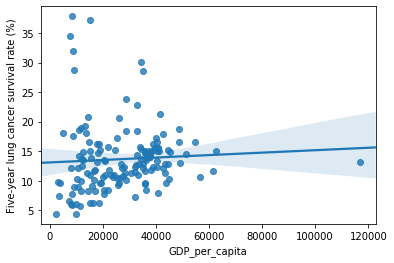

In [47]:
sns.regplot(x="GDP_per_capita", y="Five-year lung cancer survival rate (%)", data=df2_gdp)

In [48]:
df2_gdp.corr( method='pearson', min_periods=1)

,Year,Five-year lung cancer survival rate (%),GDP_per_capita,Total_pop
Year,1.00,0.10,0.08,-0.01
Five-year lung cancer survival rate (%),0.10,1.00,0.06,-0.03
GDP_per_capita,0.08,0.06,1.00,-0.29
Total_pop,-0.01,-0.03,-0.29,1.00


In [49]:
df2_gdp.head()

,Country,Code,Year,Five-year lung cancer survival rate (%),GDP_per_capita,Total_pop
0,Algeria,DZA,1999,6.00,"9,968.97","30,099,010.00"
1,Algeria,DZA,2004,8.20,"11,797.18","32,396,048.00"
2,Algeria,DZA,2009,14.80,"12,647.54","34,950,168.00"
3,Argentina,ARG,2004,20.80,"14,410.15","38,340,778.00"
4,Argentina,ARG,2009,11.90,"17,168.38","40,062,470.00"


In [50]:
df2_gdp = df2_gdp.merge(df_continents, on='Code')

In [51]:
pd.set_option('display.max_rows', None)

In [52]:
df2_gdp.head()

,Country,Code,Year,Five-year lung cancer survival rate (%),GDP_per_capita,Total_pop,Continent_Name
0,Algeria,DZA,1999,6.00,"9,968.97","30,099,010.00",Africa
1,Algeria,DZA,2004,8.20,"11,797.18","32,396,048.00",Africa
2,Algeria,DZA,2009,14.80,"12,647.54","34,950,168.00",Africa
3,Argentina,ARG,2004,20.80,"14,410.15","38,340,778.00",South America
4,Argentina,ARG,2009,11.90,"17,168.38","40,062,470.00",South America


In [53]:
df2_gdp.describe()

,Year,Five-year lung cancer survival rate (%),GDP_per_capita,Total_pop
count,154.00,154.00,154.00,154.00
mean,"2,004.55",13.72,"26,828.32","83,072,619.96"
std,4.02,5.61,"15,272.31","235,320,001.94"
min,"1,999.00",4.40,"2,445.75","278,403.00"
25%,"1,999.00",10.33,"15,028.86","4,551,793.00"
50%,"2,004.00",12.90,"25,754.20","13,735,217.50"
75%,"2,009.00",15.55,"36,316.32","58,569,505.25"
max,"2,009.00",37.80,"117,064.86","1,334,908,820.00"


In [54]:
def create_generator(continent_list):
    for continent in continent_list:
        yield continent
        
continents = create_generator(df2_gdp.Continent_Name.tolist())

In [55]:
fig = px.scatter(df2_gdp.query('Year == 2009'), x="GDP_per_capita", y="Five-year lung cancer survival rate (%)", size="Total_pop", color="Continent_Name",
           hover_name="Continent_Name", size_max=60,title="Countries related to wealth in 2009")

fig.update_xaxes(title='GDP Per Capita')
fig.update_yaxes(title='Five year lung cancer survival rate')


fig.for_each_trace(
    lambda trace: trace.update(name=next(continents)),
)


fig.show()

In [56]:
df3_gdp = df2_gdp.groupby(['Continent_Name']).mean()

In [57]:
df3_gdp

,Year,Five-year lung cancer survival rate (%),GDP_per_capita,Total_pop
Continent_Name,,,,
Africa,"2,006.50",15.92,"11,931.95","26,475,571.17"
Asia,"2,004.71",15.28,"21,638.41","253,173,327.77"
Europe,"2,004.30",12.29,"30,806.50","22,398,862.95"
North America,"2,004.62",16.14,"40,899.09","123,074,838.00"
Oceania,"2,004.00",13.25,"33,992.63","12,195,523.50"
South America,"2,005.00",16.15,"12,248.73","55,599,149.47"


In [58]:
df3_gdp = df3_gdp.reset_index()

In [59]:
def create_generator(continent_list):
    for continent in continent_list:
        yield continent
        
continents = create_generator(df3_gdp.Continent_Name.tolist())

In [60]:
fig = px.scatter(df3_gdp, x="GDP_per_capita", y="Five-year lung cancer survival rate (%)", size="Total_pop", color="Continent_Name",
           hover_name="Continent_Name", size_max=60,title="Average Survival rate by Continent ")
fig.update_xaxes(title='GDP Per Capita')
fig.update_yaxes(title='Five year lung cancer survival rate(%)')


fig.for_each_trace(
    lambda trace: trace.update(name=next(continents)),
)

fig.show()

In [61]:
fig = px.choropleth(df1_gdp, locations="Code",
                    color="Five-year lung cancer survival rate (%)", 
                    hover_name="Code", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                   title="Heat Map of the World ")
fig.show()

# Bonus : Survival Function ( do not take into consideration)

In [62]:
df_survival = pd.read_csv('../data/five-year-survival-rates-from-lung-cancer.csv')

In [63]:
def survival(data, group_field, time_field, event_field):
    kmf = KaplanMeierFitter()
    results = []

    for i in data[group_field].unique():
        group = data[data[group_field]==i]
        T = group[time_field]
        E = group[event_field]
        kmf.fit(T, E, label=str(i))
        results.append(kmf.survival_function_)

    survival = pd.concat(results, axis=1)
    front_fill = survival.fillna(method='ffill')
    back_fill = survival.fillna(method='bfill')
    smoothed = (front_fill + back_fill) / 2
    return smoothed

In [64]:
df_survival.head()

,Entity,Code,Year,Lung (%)
0,Algeria,DZA,1999,6.00
1,Algeria,DZA,2004,8.20
2,Algeria,DZA,2009,14.80
3,Argentina,ARG,2004,20.80
4,Argentina,ARG,2009,11.90


In [65]:
df1_survival = df_survival.rename(columns={"Entity":"Country","Lung (%)": "Lung_survival_rate(%)"})

In [66]:
df1_survival.head()

,Country,Code,Year,Lung_survival_rate(%)
0,Algeria,DZA,1999,6.00
1,Algeria,DZA,2004,8.20
2,Algeria,DZA,2009,14.80
3,Argentina,ARG,2004,20.80
4,Argentina,ARG,2009,11.90


In [67]:
df2_survival = df1_survival.merge(df_continents, on='Code')

In [68]:
df2_survival.head()

,Country,Code,Year,Lung_survival_rate(%),Continent_Name
0,Algeria,DZA,1999,6.00,Africa
1,Algeria,DZA,2004,8.20,Africa
2,Algeria,DZA,2009,14.80,Africa
3,Argentina,ARG,2004,20.80,South America
4,Argentina,ARG,2009,11.90,South America


In [69]:
df3_survival = df2_survival.pivot_table(values=['Lung_survival_rate(%)','Country'], index=['Continent_Name'], aggfunc={'Lung_survival_rate(%)': np.mean})

In [70]:
df3_survival.reset_index()

,Continent_Name,Lung_survival_rate(%)
0,Africa,15.92
1,Asia,15.11
2,Europe,12.29
3,North America,16.65
4,Oceania,13.25
5,South America,16.15


In [71]:
rates = survival(df2_survival, 'Continent_Name', 'Year', 'Lung_survival_rate(%)')

rates.iplot(kind='line', xTitle='Year', yTitle='Lung_survival_rate(%)',title='To determine')